<a href="https://colab.research.google.com/github/kaveripriyap/ecc-pollard-rho-algorithm/blob/main/ECC_Pollard_Rho_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tinyec

  Created wheel for tinyec: filename=tinyec-0.3.1-cp36-none-any.whl size=20767 sha256=e3f8035856a4d30cad34ce88fa1762ab8a558af13932de33840dabb23cd9a01a
  Stored in directory: /root/.cache/pip/wheels/00/2d/bd/610c1d20033b8dfbb4435ece514e2a79e7ad1e8315dae1761f
Successfully built tinyec


In [3]:
from tinyec.ec import *
import numpy as np 
import time
import matplotlib.pyplot as plt 
import math 
import random

def is_prime(n):
    if n == 2 or n == 3: return True
    if n < 2 or n%2 == 0: return False
    if n < 9: return True
    if n%3 == 0: return False
    r = int(n**0.5)
    f = 5
    while f <= r:
        if n % f == 0: return False
        if n % (f+2) == 0: return False
        f += 6
    return True  

def f(temp, p, g, h, a, b, order, part, seq):
    for i in range(part):
        if temp.x in range(int((i * p) / part), int((i + 1) * p / part)):
            for z in range(seq[2 * i] - 1):
                temp += g
            for z in range(seq[2 * i + 1] - 1):
                temp += h
            a += seq[2 * i] % order
            b += seq[2 * i + 1] % order
    return temp, a, b

#Initialise function f
def f_xy(temp, p, g, h, a, b, n):
    if temp.y in range (0, int(p/3)):
        temp = temp + h
        b = (1 + b) % n
    elif temp.y in range (int(p/3), int(2*p/3)):
        temp = temp + temp
        a =(2 * a) % n
        b =(2 * b) % n
    else:
        temp = temp + g
        a = (a + 1) % n
    return temp, a, b

def fn_xy(temp, p, g, h, a, b, num, n):
    for i in range(num):
        temp, a, b = f_xy(temp, p, g, h, a, b, n)
    return temp, a, b

#Iterate f
def fn(temp, p, g, h, a, b, num, n, part, seq):
    for i in range(num):
        temp, a, b = f(temp, p, g, h, a, b, n, part, seq)
    return temp, a, b

def getOrder(n, N,g):
    while True:
        if (0*g == N):
            break
        N = N + g
        n += 1
    return n

def PollardRho(start, i, p, g, h, n, part, seq):
    temp1 = start
    temp2 = start
            
    # ag+bh
            
    a1 = 3
    b1 = 1
            
    a2 = 4
    b2 = 1
            
    num = 2 + i # Number of times f is iterated

    if i == 0:
        temp1, a1, b1 = f(temp1, p, g, h, a1, b1, n, part, seq)
        temp2, a2, b2 = fn(temp2, p, g, h, a2, b2, 2, n, part, seq)

        # Checking for collision
        k = 1
        while temp1!=temp2:
            k += 1
            if temp1 != 0*curve.g or temp2 != 0*curve.g:
                temp1, a1, b1 = f(temp1, p, g, h, a1, b1, n, part, seq)
                temp2, a2, b2 = fn(temp2, p, g, h, a2, b2, 2, n, part, seq)
            else:
                break
        return k
    elif i == 1:
        temp1, a1, b1 = f_xy(temp1, p, g, h, a1, b1, n)
        temp2, a2, b2 = fn_xy(temp2, p, g, h, a2, b2, 2, n)

        # Checking for collision
        k = 1
        while temp1!=temp2:
            k += 1
            if temp1 != 0*curve.g or temp2 != 0*curve.g:
                temp1, a1, b1 = f_xy(temp1, p, g, h, a1, b1, n)
                temp2, a2, b2 = fn_xy(temp2, p, g, h, a2, b2,2, n)
            else:
                break
        return k

low = 100
high = 400
primes = [i for i in range(low, high) if is_prime(i)]

part = 50
seq = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 
           6, 2, 6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 
           1, 6, 9, 3, 9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 
           4, 5, 9, 2, 3, 0, 7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 
           9, 8, 6, 2, 8, 0, 3, 4, 8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9]
seq2 = [2, 7, 1, 8, 2, 8, 1, 8, 2, 8, 4, 5, 9, 0, 4, 5, 2, 3, 5, 3, 
          6, 0, 2, 8, 7, 4, 7, 1, 3, 5, 2, 6, 6, 2, 4, 9, 7, 7, 5, 7, 
          2, 4, 7, 0, 9, 3, 6, 9, 9, 9, 5, 9, 5, 7, 4, 9, 6, 6, 9, 6, 
          7, 6, 2, 7, 7, 2, 4, 0, 7, 6, 6, 3, 0, 3, 5, 3, 5, 4, 7, 5, 
          9, 4, 5, 7, 1, 3, 8, 2, 1, 7, 8, 5, 2, 5, 1, 6, 6, 4, 2, 7, 4]
phi = [1, 6, 1, 8, 0, 3, 3, 9, 8, 8, 7, 4, 9, 8, 9, 4, 8, 4, 8, 2, 0]
#coef = [1, 2]
#for i in range(2 * (part-1)):
#    coef.append(coef[i + 1] + coef[i])

Start
53.35537385940552


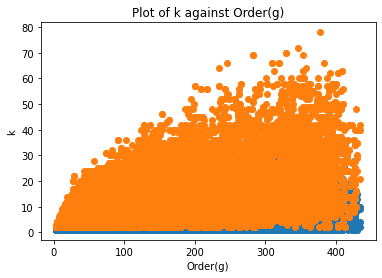

In [4]:
start = time.time()
print("Start")
K = []

for i in range(2):
    K.append([])

OrderG = []

for j in range (10000):

    prime = random.choice(primes)

    p = prime #Chosen Prime

    x = random.randint(1,50)
    y = random.randint(1,50)

    field = SubGroup(p=p, g=(x, y), n=np.inf , h=1) #Define Field, Starting Point, Order = n, cofactor = h

    a = random.randint(1,100)

    b = y**2 - x**3 - a * x
    
    while (4*a**3 + 27*b**2 == 0):
        a = random.randint(1,100)
        b = y**2 - x**3 - a * x

    curve = Curve(a=a, b=b, field=field, name='random') # y^2 = x^3 + a * x + b
    
    # To find order of g
    n = getOrder(1,curve.g,curve.g)
    
    field = SubGroup(p=p, g=(x, y), n=n , h=1)
    curve = Curve(a=a, b=b, field=field, name='random')

    k_i = random.randint(2,n-1) # k is the secret key

    # h = k * g mod p
    h = curve.g
    for i in range(k_i-1):
        h = h + curve.g
    while h.y == 0 or h.x == 0:
        h = h+curve.g
    g = curve.g
    OrderG.append(n)
    for i in range(2):
        #start = time.time() # start timer
        k = PollardRho(g, i, p, g, h, n, part, seq)
        K[i].append(k)
        
    OrderG.append(n)
    for i in range(2):
        #start = time.time() # start timer
        k = PollardRho(h, i, p, g, h, n, part, seq)
        K[i].append(k)

end = time.time()
print(end-start)
plt.scatter(OrderG, K[0])
plt.scatter(OrderG, K[1])
plt.xlabel('Order(g)')
plt.ylabel('k')
plt.title('Plot of k against Order(g)')
plt.show()

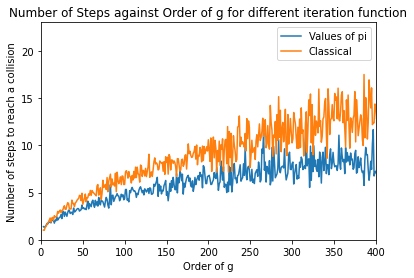

In [5]:
g = [0] * max(OrderG)
freq = [0] * max(OrderG)
outG = []
outK = []
    
for i in range(2):
    outK.append([])
    outG.append([])

for i in range(2):
    for j in range(len(OrderG)):
        g[OrderG[j]-1] = K[i][j] + g[OrderG[j]-1]
        freq[OrderG[j]-1]+=1

    for j in range(max(OrderG)):
        if freq[j]>1:
            g[j] = g[j]/freq[j]
        if g[j]!=0:
            outK[i].append(g[j])
            outG[i].append(j+1)

plt.plot(outG[0], outK[0], label='Values of pi')
plt.plot(outG[1], outK[1], label='Classical')
plt.xlim(0, 400)
plt.ylim(0, 23)
plt.xlabel('Order of g')
plt.ylabel('Number of steps to reach a collision')
plt.title('Number of Steps against Order of g for different iteration function')
plt.legend()
plt.show()